In [4]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline 

## Notes from viz lectures

### Simplification
* Figure out consolidation schemes--ratios might be useful for rxtr params
* Exclude or dim unimportant data

### Headings for training set viz
* Goal for i.i.d. training set accomplished / not accomplished
* Certain locations in training set space difficult to predict OR error higher in certain locations in training set space
* Natural uranium not reliably predicted by any algorithm
* Complex models predict x parameters better than simple models (or vice versa)

In [5]:
# color dict (use: colors['XColor'])

colors = {'DBrwn' : '#8c510a', 'MBrwn' : '#d8b365', 'LBrwn' : '#f6e8c3',
          'DTeal' : '#01665e', 'MTeal' : '#5ab4ac', 'LTeal' : '#c7eae5',
          'DPurp' : '#762a83', 'MPurp' : '#af8dc3', 'LPurp' : '#e7d4e8'
         }
# set params
# save as .mplstyle file and import with: plt.style.use('file')
#mpl.rcParams['lines.linewidth'] = 2
#mpl.rcParams['lines.color'] = 'r'

## Predictions

In [24]:
rxtr = pd.read_csv('results/28march2018/sfcompo_fiss_reactor_predictions.csv').rename(columns = {'Unnamed: 0':'Instance'})
# MWd/MTU
burn = pd.read_csv('results/28march2018/sfcompo_fiss_burnup_predictions.csv').rename(columns = {'Unnamed: 0':'Instance'})
# %u235
enri = pd.read_csv('results/28march2018/sfcompo_fiss_enrichment_predictions.csv').rename(columns = {'Unnamed: 0':'Instance'})
# days
cool = pd.read_csv('results/28march2018/sfcompo_fiss_cooling_predictions.csv').rename(columns = {'Unnamed: 0':'Instance'})

rxtr.columns

Index(['Instance', 'Ridge', 'SVR', 'TrueY', 'kNN'], dtype='object')

## Scores

In [30]:
r_scr = pd.read_csv('results/28march2018/sfcompo_fiss_reactor_scores.csv').rename(columns = {'Unnamed: 0':'CV_fold'})
# MWd/MTU
b_scr = pd.read_csv('results/28march2018/sfcompo_fiss_burnup_scores.csv').rename(columns = {'Unnamed: 0':'CV_fold'})
# %u235
e_scr = pd.read_csv('results/28march2018/sfcompo_fiss_enrichment_scores.csv').rename(columns = {'Unnamed: 0':'CV_fold'})
# days
c_scr = pd.read_csv('results/28march2018/sfcompo_fiss_cooling_scores.csv').rename(columns = {'Unnamed: 0':'CV_fold'})

print(r_scr.columns)
print('\n')
print(e_scr.columns)
c_scr

Index(['CV_fold', 'fit_time', 'score_time', 'test_accuracy', 'algorithm'], dtype='object')


Index(['CV_fold', 'fit_time', 'score_time', 'test_explained_variance',
       'test_neg_mean_absolute_error', 'test_neg_mean_squared_error',
       'test_r2', 'test_neg_rmse', 'algorithm'],
      dtype='object')


,CV_fold,fit_time,score_time,test_explained_variance,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_r2,test_neg_rmse,algorithm
0,0,0.137514,1.137567,0.999251,-6.490993,-550.655799,0.999205,-23.466056,knn
1,1,0.137896,1.136452,0.999253,-5.917281,-567.826647,0.999211,-23.829113,knn
2,2,0.137427,1.161131,0.999353,-5.678863,-450.903183,0.999316,-21.234481,knn
3,3,0.137265,1.126671,0.999031,-6.409396,-680.338015,0.998978,-26.083290,knn
4,4,0.137094,1.185698,0.999460,-5.443796,-414.300897,0.999426,-20.354383,knn
5,0,0.017263,0.002099,0.793863,-251.384983,-135205.087445,0.793653,-367.702444,rr
6,1,0.009887,0.002021,0.771980,-273.255224,-167055.407505,0.771441,-408.724122,rr
7,2,0.009873,0.002095,0.777843,-278.563280,-169700.397728,0.776966,-411.947081,rr
8,3,0.009882,0.002055,0.800505,-249.384594,-128465.597209,0.799563,-358.420978,rr
9,4,0.010991,0.002639,0.772514,-263.481382,-152126.795507,0.772402,-390.034352,rr


In [19]:
trainXY = pd.read_pickle("sfcompo_pickles/not-scaled_trainset_nucs_fissact_8dec.pkl")
#x = len(trainXY.columns)-3
#dfX = trainXY.iloc[:, 0:x]
#dfY_e = trainXY.iloc[:, x+1]
#dfY_b = trainXY.iloc[:, x+2]
trainXY.columns

Index(['Burnup', 'CoolingTime', 'Enrichment', 'ReactorType', 'ba138', 'ce140',
       'ce142', 'ce144', 'cs133', 'cs135', 'cs137', 'la139', 'mo100', 'mo95',
       'mo97', 'mo98', 'nd143', 'nd144', 'nd145', 'nd146', 'pd104', 'pd105',
       'pd106', 'pr141', 'pu239', 'pu240', 'pu241', 'pu242', 'rb87', 'rh103',
       'ru101', 'ru102', 'ru104', 'sr88', 'sr90', 'tc99', 'total', 'u234',
       'u235', 'u236', 'u238', 'xe131', 'xe132', 'xe134', 'xe136', 'y89',
       'zr91', 'zr92', 'zr93', 'zr94', 'zr96'],
      dtype='object')

In [20]:
# nucs messed up somehow and labels are at beginning
x = len(trainXY.columns)
dfY_b = trainXY.iloc[:, 0]
dfY_c = trainXY.iloc[:, 1]
dfY_e = trainXY.iloc[:, 2]
dfY_r = trainXY.iloc[:, 3]
dfX = trainXY.iloc[:, 4:x]

## Burnup v. Enrichment here

In [25]:
x = dfY_b//1000.
y = dfY_e
#bin stuff
xbin = 1.5
ybin = 0.15
xmax = np.max(np.abs(x))
ymax = np.max(np.abs(y))
xlim = (int(xmax/xbin) + 1)*xbin
ylim = (int(ymax/ybin) + 1)*ybin
xbins = np.arange(0, xlim + xbin, xbin)
ybins = np.arange(0, ylim + ybin, ybin)
xcount, xdivs = np.histogram(x, bins=xbins)
ycount, ydivs = np.histogram(y, bins=ybins)

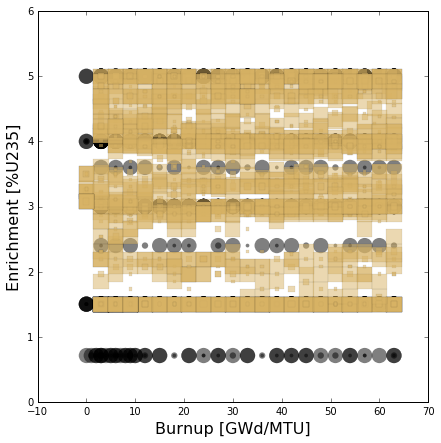

## Correlate Features

In [14]:
cols_fissact = ['u235', 'u236', 'u238',
                'pu239', 'pu240', 'pu241', 'pu242',
               ]
df_filtered = dfX[cols_fissact]

corr = df_filtered.corr()
#plt.matshow(corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, 
            cmap=sns.diverging_palette(220, 10, as_cmap=True))

In [ ]:
#other features

other_cols = ['cs137', 'u234', 'sr90', 'u238', ]
df_other = dfX[other_cols]

other_corr = df_other.corr()
sns.heatmap(other_corr, 
            xticklabels=other_corr.columns.values,
            yticklabels=other_corr.columns.values, 
            cmap=sns.diverging_palette(220, 10, as_cmap=True))

In [ ]:
sns.pairplot(df_other)

In [ ]:
fig, axScatter = plt.subplots(figsize=(7, 7))
#axScatter.scatter(x, y, s=ycount*0.1, c=colors['MTeal'], alpha=0.5, linewidths=0.1, marker='o', label='Ground Truth')
axScatter.scatter(x, y, s=ycount*0.1, c='k', alpha=0.5, linewidths=0.1, marker='o', label='Ground Truth')
# commenting out diff algs; can do diff plots
axScatter.scatter(burn_knn, enr_knn, s=ycount*0.1, c=colors['MBrwn'], alpha=0.5, linewidths=0.1, marker='s', label='kNN Pred')
#axScatter.scatter(burn_rr, enr_rr, s=ycount*0.1, c=colors['MPurp'], alpha=0.5, linewidths=0.1, marker='s', label='Ridge Pred')
#axScatter.scatter(burn_svr, enr_svr, s=ycount*0.1, c=colors['MTeal'], alpha=0.5, linewidths=0.1, marker='s', label='SVR Pred')
#axScatter.legend()
plt.xlabel('Burnup [GWd/MTU]', fontsize=16)
plt.ylabel('Enrichment [%U235]', fontsize=16)
# comment out to see the really bad predictions
#plt.ylim(ymax=6)
fig.savefig('test.png', bbox_inches='tight')
plt.show()

In [ ]:
fig.clf()
fig, axScatter = plt.subplots(figsize=(12,10))
#fig.suptitle('test title', fontsize=20)
axScatter.scatter(x, y, c='k', s=10, linewidths=0.1, marker='o', label='Ground Truth')
#axScatter.scatter(burn_knn, enr_knn, c=colors['MBrwn'], s=10, linewidths=0.1, marker='s', label='kNN Pred')
#axScatter.scatter(burn_rr, enr_rr, c=colors['MPurp'], s=10, linewidths=0.1, marker='s', label='Ridge Pred')
axScatter.scatter(burn_svr, enr_svr, c=colors['MTeal'], s=10, linewidths=0.1, marker='s', label='SVR Pred')
axScatter.legend()
plt.xlabel('Burnup [GWd/MTU]', fontsize=16)
plt.ylabel('Enrichment [%U235]', fontsize=16)
divider = make_axes_locatable(axScatter)
axHistx = divider.append_axes("top", 1, pad=0.2, sharex=axScatter)
axHisty = divider.append_axes("right", 1.75, pad=0.2, sharey=axScatter)
axHistx.hist(x, bins=xbins, color='0.5')
axHisty.hist(y, bins=ybins, orientation='horizontal', color='0.5')
plt.setp(axHistx.get_xticklabels(), visible=False)
plt.setp(axHisty.get_yticklabels(), visible=False)
axHistx.set_yticks([0, 250, 500])
axHisty.set_xticks([0, 1000, 2000])
# comment out to see the really bad predictions
#plt.ylim(ymax=6)
plt.show()